In [2]:
import pandas as pd

user = pd.read_csv('Downloads/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


## 차원의 저주란?

* 데이터의 차원이 너무 많아지면 분석의 정확도가 떨어짐

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

user_mean = user.mean()
user_std = user.std()
scaled_df = (user-user_mean)/user_std

In [7]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

<AxesSubplot:>

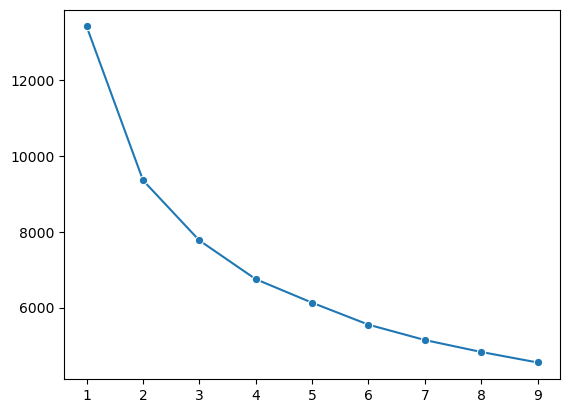

In [8]:
sns.lineplot(x=ks, y=inertias, marker='o')

<AxesSubplot:>

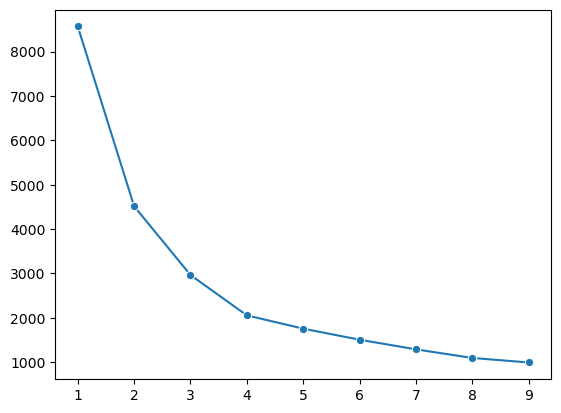

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #n_components : 유지할 차원의 갯수
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

In [11]:
user

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
...,...,...,...,...,...,...
2232,46,56,1,1341,18,3
2233,56,77,3,444,22,5
2234,91,42,0,1241,19,1
2235,8,67,1,843,23,3


In [14]:
user = pd.read_csv('Downloads/custom_data.csv')
user = user.drop('children', axis = 1)
user

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3
...,...,...,...,...,...
2232,46,56,1341,18,3
2233,56,77,444,22,5
2234,91,42,1241,19,1
2235,8,67,843,23,3


In [20]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

user = pd.read_csv('Downloads/custom_data.csv')

user_mean = user.mean()
user_std = user.std()
scaled_df = (user-user_mean)/user_std

In [21]:
pca = PCA(n_components=2) #유지할 차원의 갯수
pca.fit(scaled_df) #PCA 학습

scaled_df_pca = pca.transform(scaled_df) #학습된 PCA 모델을 바탕으로 데이터를 변환
pca_df = pd.DataFrame(scaled_df_pca)
pca_df.columns = ['PC1', 'PC2']

pca_df

,PC1,PC2
0,-3.043476,0.646301
1,1.926976,0.528713
2,-1.501383,-0.117994
3,1.168100,-1.373146
4,0.226542,-0.077045
...,...,...
2232,-0.570199,0.862978
2233,2.466785,3.622251
2234,-2.314179,-1.038163
2235,-0.436140,1.366362


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

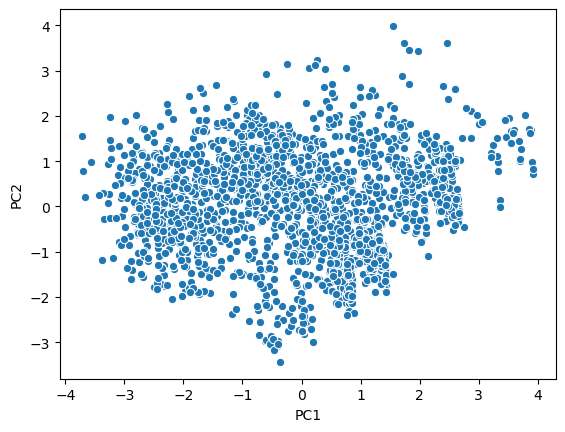

In [23]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2')

# 적절한 주성분 수 구하기

* pca를 적용할 때 몇 개의 주성분으로 차원을 축소시킬지를 정해야한다
* 이 때, 사용되는 것이 Scree plot

In [25]:
pca = PCA(n_components= 6)
pca.fit(scaled_df)
scaled_df_pc = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.043476,0.646301,-0.249843,0.704499,-0.066913,0.376684
1,1.926976,0.528713,0.431355,1.255031,0.085687,0.642017
2,-1.501383,-0.117994,0.800846,0.379732,-0.367393,-0.553751
3,1.168100,-1.373146,0.668054,-0.608071,0.036437,-0.285106
4,0.226542,-0.077045,-1.553274,-1.107927,-0.463466,-0.381861
...,...,...,...,...,...,...
2232,-0.570199,0.862978,0.180888,-0.487677,0.747510,0.006681
2233,2.466785,3.622251,0.128405,-0.141909,-0.148574,0.053997
2234,-2.314179,-1.038163,-1.562798,-0.484231,-0.080357,0.376385
2235,-0.436140,1.366362,1.570209,0.230916,-0.200538,-0.306402


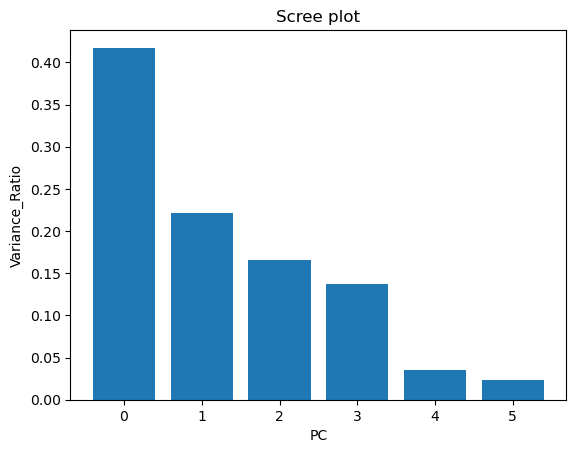

In [28]:
#6개의 PC가 각각 전체 데이터에 대해서 어느 정도 설명력을 가지는지,
#즉, 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인

import numpy as np

num_components = len(pca.explained_variance_ratio_) #PCA 개수
x = np.arange(num_components)
var = pca.explained_variance_ratio_

plt.bar(x, var)

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

* PC1은 전체 주성분이 설명해주는 데이터의 특성 대비 40% 설명
* PC2는 전체 주성분이 설명해주는 데이터의 특성 대비 20% 설명

####  최적의 주성분 갯수
* PC1부터 PC_N까지 분산 비율의 합을 누적했을 때 전체 대비 70% 이상이 되는 PC_N을 고르면 된다

In [29]:
cum_var = np.cumsum(var) #누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars':cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


* 70%가 절대적인 기준은 아니다. 데이터의 복잡성과 분석 목적에 따라 충분히 달라질 수 있다

In [30]:
credit_df1 = pd.read_csv('Downloads/CC_GENERAL.csv')
credit_df1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [32]:
credit_df2 = credit_df1.drop('CUST_ID', axis=1)
credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [33]:
scaled_credit_df2 = (credit_df2 - credit_df2.mean())/credit_df2.std()

In [34]:
X = scaled_credit_df2.copy()

pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1
0,-1.682126,-1.076390
1,-1.138231,2.506337
2,0.969630,-0.383499
3,-0.873579,0.043163
4,-1.599344,-0.688542
...,...,...
8945,-0.359609,-2.016033
8946,-0.564338,-1.639031
8947,-0.926152,-1.810684
8948,-2.336421,-0.657929


In [35]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

<AxesSubplot:>

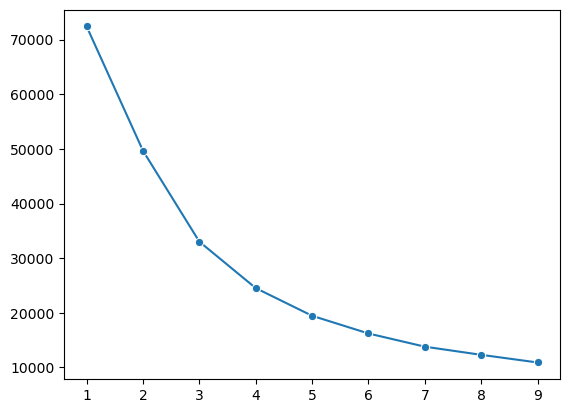

In [36]:
sns.lineplot(x=ks, y=inertias, marker='o')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

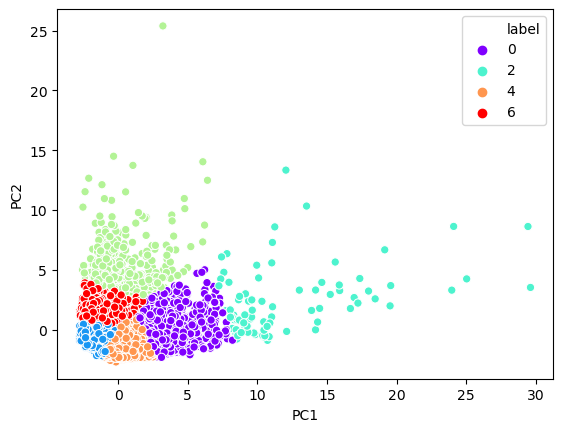

In [39]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')


In [40]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()


cluster
0     942
1    2980
2     431
3    1580
4    2949
5      68
Name: CUST_ID, dtype: int64

In [41]:
credit_df1.groupby(credit_df1['cluster']).mean().T

cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139
PURCHASES,3889.792442,212.189852,708.445568,267.821076,947.616229,17046.403235
ONEOFF_PURCHASES,2432.561879,154.415151,451.321462,185.518924,435.348976,11458.830147
INSTALLMENTS_PURCHASES,1457.867505,58.131134,257.279443,82.338051,512.572709,5587.573088
CASH_ADVANCE,502.737101,378.877176,6947.708667,2387.107874,104.251218,1246.094188
PURCHASES_FREQUENCY,0.952202,0.181288,0.332345,0.190118,0.828495,0.949510
ONEOFF_PURCHASES_FREQUENCY,0.660313,0.071704,0.168825,0.090456,0.240079,0.773908
PURCHASES_INSTALLMENTS_FREQUENCY,0.770525,0.103170,0.224401,0.107092,0.646225,0.835183
CASH_ADVANCE_FREQUENCY,0.074165,0.084142,0.589569,0.352214,0.024358,0.095588


In [42]:
credit_df1.groupby(credit_df1['cluster']).mean().T.iloc[[0,1],]


cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139
